In [3]:
  # Checking if FastAI is up to date
  !curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# Google Colab package to access files via Google Drive
# Importing all from FastAI package
from  google.colab import drive
from fastai.vision import *

In [5]:
# Mounting Google Drive to access the image folders
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Root folder path
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
# Only do this once
# Creates main Fruit folder
#(Path(root_path)/'Fruit').mkdir(parents=True, exist_ok=True)

In [7]:
# Sub-folders path
proj_path = 'gdrive/My Drive/AI_Projects/Fruit/'

In [8]:
# Folder names
folders = ['red_apple','green_apple','banana','orange','red_grape','green_grape','pear','watermelon','strawberry','kiwi','peach','blueberry']

In [ ]:
# Only do this once
# Creates all folders in /Fruit
#for i in folders:
  #path = Path(proj_path)
  #dest = (path/i).mkdir(parents=True, exist_ok=True)

In [9]:
# Path for Fast AI
p_path = Path(proj_path)

In [10]:
# Splitting images into 80/20 and transforming/normalizing them
np.random.seed(9)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
data.classes

['banana',
 'blueberry',
 'green_apple',
 'green_grape',
 'kiwi',
 'orange',
 'peach',
 'pear',
 'red_apple',
 'red_grape',
 'strawberry',
 'watermelon']

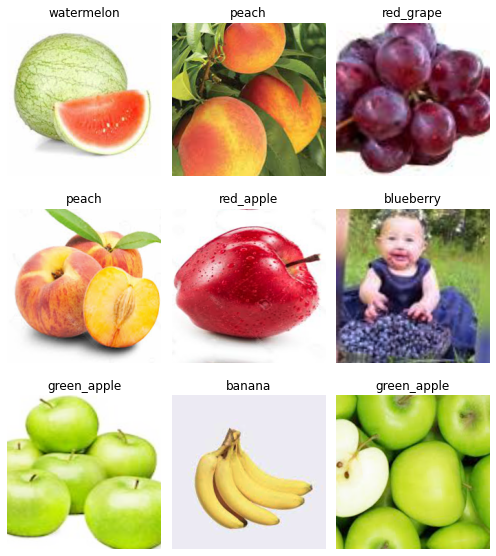

In [12]:
# Training image samples
data.show_batch(rows=3,figsize=(7,8))

In [13]:
# 12 classes, 1270 training images, 317 testing images
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['banana',
  'blueberry',
  'green_apple',
  'green_grape',
  'kiwi',
  'orange',
  'peach',
  'pear',
  'red_apple',
  'red_grape',
  'strawberry',
  'watermelon'],
 12,
 1270,
 317)

In [14]:
# Create CNN learner object
# Implementing ResNet34 into the CNN learner object
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [15]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.846694,0.552854,0.160883,02:06
1,1.408476,0.173492,0.056782,00:15
2,0.840748,0.141542,0.047319,00:13
3,0.558191,0.125678,0.037855,00:13
4,0.397360,0.126195,0.041009,00:13
5,0.284636,0.123432,0.044164,00:13
6,0.211221,0.123173,0.041009,00:13
7,0.167866,0.120512,0.041009,00:12


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [16]:
# Saves model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Fruit/models/model1_34.pth')

In [17]:
# Unfreezes model
learn.unfreeze()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


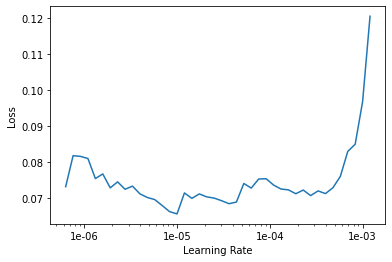

In [18]:
# Finding optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [19]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.078544,0.121246,0.047319,00:13
1,0.081463,0.122892,0.044164,00:13


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


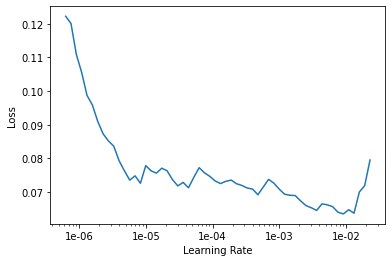

In [20]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
# Save as new model even though it performs similarly to the first model
learn.save('model2_34')

In [29]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


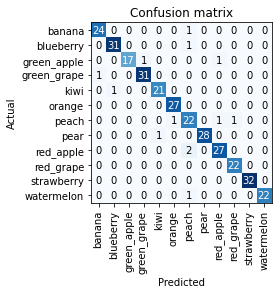

In [30]:
# Correlation Matrix 
interp.plot_confusion_matrix()

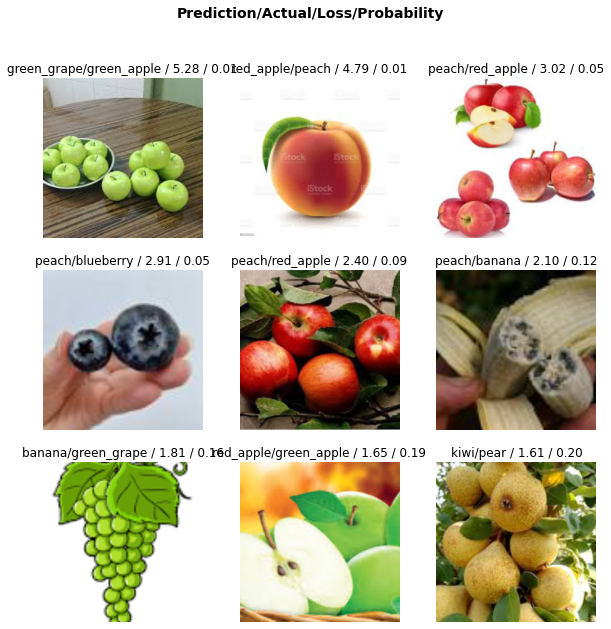

In [31]:
# Plots the most wrong guesses
interp.plot_top_losses(9, figsize=(10,10))